In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
df=pd.read_csv('Health index2.csv')

In [3]:
df.head(10)

,Hydrogen,Oxigen,Nitrogen,Methane,CO,CO2,Ethylene,Ethane,Acethylene,DBDS,Power factor,Interfacial V,Dielectric rigidity,Water content,Health index
0,2845,5860,27842,7406,32,1344,16684,5467,7,19.0,1.00,45,55,0,95.2
1,12886,61,25041,877,83,864,4,305,0,45.0,1.00,45,55,0,85.5
2,2820,16400,56300,144,257,1080,206,11,2190,1.0,1.00,39,52,11,85.3
3,1099,70,37520,545,184,1402,6,230,0,87.0,4.58,33,49,5,85.3
4,3210,3570,47900,160,360,2130,4,43,4,1.0,0.77,44,55,3,85.2
5,13500,343,36500,3150,113,984,5,1230,1,1.0,4.93,37,52,6,75.6
6,10200,11900,33700,573,87,611,0,162,0,1.0,3.53,45,55,5,75.6
7,3,15459,41347,5,68,902,12,2,13,5.0,0.58,41,71,6,73.2
8,16,2470,59600,8,520,2660,5,8,2,164.0,0.29,44,56,4,72.8
9,488,11861,48353,13,85,1957,29,23,0,164.0,0.27,37,72,10,68.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Hydrogen             470 non-null    int64  
 1   Oxigen               470 non-null    int64  
 2   Nitrogen             470 non-null    int64  
 3   Methane              470 non-null    int64  
 4   CO                   470 non-null    int64  
 5   CO2                  470 non-null    int64  
 6   Ethylene             470 non-null    int64  
 7   Ethane               470 non-null    int64  
 8   Acethylene           470 non-null    int64  
 9   DBDS                 470 non-null    float64
 10  Power factor         470 non-null    float64
 11  Interfacial V        470 non-null    int64  
 12  Dielectric rigidity  470 non-null    int64  
 13  Water content        470 non-null    int64  
 14  Health index         470 non-null    float64
dtypes: float64(3), int64(12)
memory usage: 5

In [5]:
canttrafos=df.shape[0]
df.shape

(470, 15)

In [6]:
df.sample()

,Hydrogen,Oxigen,Nitrogen,Methane,CO,CO2,Ethylene,Ethane,Acethylene,DBDS,Power factor,Interfacial V,Dielectric rigidity,Water content,Health index
394,3,4070,34800,7,761,2570,0,0,0,0.0,1.0,32,55,12,13.4


In [7]:
correlation_matrix = df.corr()
# Obtener la correlación con el 'Health index' y ordenar de mayor a menor
correlation_with_health_index = correlation_matrix['Health index'].sort_values(ascending=False)

# Mostrar las variables más correlacionadas
print(correlation_with_health_index)


Health index           1.000000
DBDS                   0.468809
Interfacial V          0.400216
Hydrogen               0.377388
Methane                0.361770
Ethylene               0.271504
Acethylene             0.240143
Ethane                 0.236507
CO2                    0.168777
Oxigen                 0.121009
CO                     0.112751
Power factor           0.092729
Nitrogen               0.089455
Dielectric rigidity   -0.104426
Water content         -0.281165
Name: Health index, dtype: float64


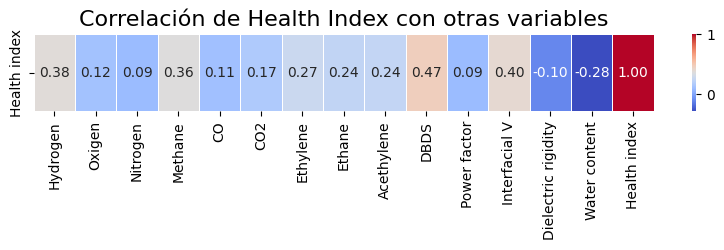

In [8]:
# Filtrar la correlación solo con la variable 'Health index'
correlation_health_index = correlation_matrix.loc[['Health index']]

# Crear el heatmap para la fila de 'Health index'
plt.figure(figsize=(10, 1))  # Ajustar el tamaño de la figura (1 para que sea una sola fila)
sns.heatmap(correlation_health_index, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Título del heatmap
plt.title('Correlación de Health Index con otras variables', fontsize=16)

# Mostrar el gráfico
plt.show()



In [9]:
print(df['Health index'].min(), df['Health index'].max())


13.4 95.2


In [10]:
import pandas as pd
import numpy as np

# Definir los rangos de Health Index basados en la tabla
bins = [0, 30, 50, 70, 85, 100]  # Intervalos de Health Index
labels = ['0-30 (Very Poor)', '30-50 (Poor)', '50-70 (Fair)', '70-85 (Good)', '85-100 (Very Good)']  # Etiquetas con los rangos

# Crear una nueva columna con la clasificación de Health Index usando pd.cut
df['Condition'] = pd.cut(df['Health index'], bins=bins, labels=labels, include_lowest=True)

# Agrupar por los intervalos de Health Index y contar la cantidad de registros en cada grupo
grouped_df = df.groupby('Condition', observed=True).count()

# Mostrar el DataFrame agrupado con el rango de pertenencia
print(grouped_df['Health index'])


Condition
0-30 (Very Poor)      285
30-50 (Poor)          135
50-70 (Fair)           41
70-85 (Good)            4
85-100 (Very Good)      5
Name: Health index, dtype: int64


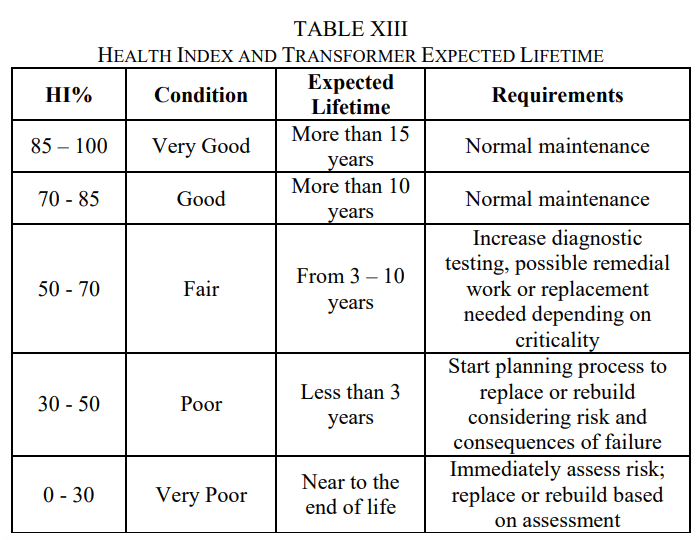

In [11]:
malostrafos=df[df['Condition']=='0-30 (Very Poor)']['Condition'].count()
print(f'La cantidad de trafos de mala calidad representan el {(malostrafos/canttrafos)*100:.2f}% de la muestra')

La cantidad de trafos de mala calidad representan el 60.64% de la muestra


In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Suponemos que ya tienes tu DataFrame 'df' cargado con todas las columnas mencionadas
# Asegúrate de que todas las columnas sean numéricas o estén correctamente procesadas.

# Asignar pesos basados en la correlación observada (valores simulados basados en tu gráfico)
weights = {
    'Hydrogen': 0.38,       # Correlación positiva fuerte
    'Methane': 0.36,        # Correlación positiva moderada
    'DBDS': 0.47,           # Correlación moderada
    'Interfacial V': 0.4,  # Correlación moderada
    'Ethylene': 0.27,       # Correlación más baja
    'Water content': -0.28,  # Correlación negativa moderada
    'Dielectric rigidity': -0.1,  # Correlación negativa leve
    # Añadir los pesos para las demás variables
    'Oxigen': 0.12, 
    'CO': 0.1,
    'CO2': 0.17,
    'Nitrogen': 0.09,
    'Ethane': 0.24,
    'Acethylene': 0.24,
    'Power factor': 0.09
}

# Aplicar los pesos a las columnas (esto escala las columnas por su importancia)
for feature, weight in weights.items():
    df[feature] = df[feature] * weight

# Seleccionar las variables independientes (features) y la variable dependiente (target)
X = df.drop(columns=['Health index','Condition'])  # Excluimos 'Health index'
y = df['Health index']

# Dividir los datos en conjuntos de entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo - en este caso, usaremos Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo
model.fit(X_train_scaled, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

# Evaluar el modelo
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")


RMSE: 9.857159254079427
R²: 0.7355750456476146


In [13]:
# Calcular MSE
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")


MSE: 97.16358856028367


In [14]:
# Calcular MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Mostrar el MAPE calculado
print(f"MAPE: {mape}%")


MAPE: 25.13407870289483%


In [15]:
# Definir un supuesto transformador con sus valores para todas las características
transformador_supuesto = {
    'Hydrogen': 50,        # Reemplaza con el valor correspondiente
    'Methane': 25,         # Reemplaza con el valor correspondiente
    'DBDS': 100,           # Reemplaza con el valor correspondiente
    'Interfacial V': 30,   # Reemplaza con el valor correspondiente
    'Ethylene': 20,        # Reemplaza con el valor correspondiente
    'Water content': 2,    # Reemplaza con el valor correspondiente
    'Dielectric rigidity': 100,  # Reemplaza con el valor correspondiente
    'Oxigen': 70,          # Reemplaza con el valor correspondiente
    'CO': 10,              # Reemplaza con el valor correspondiente
    'CO2': 40,             # Reemplaza con el valor correspondiente
    'Nitrogen': 30,        # Reemplaza con el valor correspondiente
    'Ethane': 15,          # Reemplaza con el valor correspondiente
    'Acethylene': 5,       # Reemplaza con el valor correspondiente
    'Power factor': 0.95   # Reemplaza con el valor correspondiente
}

# Convertir el supuesto transformador en un DataFrame
df_transformador = pd.DataFrame([transformador_supuesto])


# Aplicar los mismos pesos a las columnas del transformador supuesto
for feature, weight in weights.items():
    df_transformador[feature] = df_transformador[feature] * weight

# Asegurarse de que el orden de las columnas coincida con el DataFrame usado en el entrenamiento
df_transformador = df_transformador[X.columns]  # Usamos el orden de columnas de X (features)

# Escalar los datos del supuesto transformador
df_transformador_scaled = scaler.transform(df_transformador)

# Hacer la predicción del Health Index del transformador supuesto
health_index_pred = model.predict(df_transformador_scaled)

# Mostrar el resultado de la predicción
print(f"Predicción del Health Index para el transformador supuesto: {health_index_pred[0]}")


Predicción del Health Index para el transformador supuesto: 52.53999999999999
